In [1]:
# If not installed, run this cell. It is needed to access Metrics of Hydrologic Skill
#!pip install HydroErr
#!pip show HydroErr

In [2]:
#!pip install --upgrade numpy

In [5]:
import pandas as pd
import HydroErr as he
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
css_folder = r"Z:\PhD_Datasets&Analysis\Info_Inputs\Streamflow_Stations\Climate_Sensitive_Stations-GRDC"

filtered_css = pd.read_csv(css_folder + "//CSS_FINAL_SELECTION-MERGE_WITH_ALL.csv") # Read file with all CSS information
filtered_css

,station_name,station_no,station_id,station_latitude,station_longitude,station_status,river_name,station_elevation,CATCHMENT_SIZE,NAT_STA_ID,GRDCCOUNTRY,Continent,has_monthly_k,has_daily_k,monthly_k_recession,daily_k_recession,Next_Downstream_Station,CATCHMENT_SIZE2,Priority,Val_Analysis_Monthly_k
0,ABERCROMBIE,5204121,1075206,-33.954800,149.325200,Active,ABERCROMBIE RIVER,426.55,"2631,00 km²",412028,AU - AUSTRALIA,Oceania,Yes,No,0.420650,NaN,5204302,2631.00,432,Yes
1,ABOVE BOULEAU CREEK,4215070,1069050,50.212223,-119.538610,Active,WHITEMAN CREEK,630.00,"112,00 km²",08NM174,CA - CANADA,North America,Yes,Yes,0.350868,0.910436,4215103,112.00,773,Yes
2,"ABOVE CHENEY RESERVOIRE, KS",4125110,1069620,37.863600,-98.014800,Active,NORTH FORK NINNESCAH RIVER,443.80,"2038,30 km²",07144780,US - UNITED STATES,North America,Yes,Yes,0.417039,0.541509,4125801,2038.30,478,No
3,ABOVE FORT MCPHERSON,4208040,1068040,67.248886,-134.883060,Active,PEEL RIVER,NaN,"70600,00 km²",10MC002,CA - CANADA,North America,Yes,Yes,0.625278,0.942386,NaN,70600.00,59,No
4,"ABOVE HAMBURG, IA",4122160,1068596,40.632500,-95.625800,Active,NISHNABOTNA RIVER,272.54,"7267,50 km²",06810000,US - UNITED STATES,North America,Yes,Yes,0.549697,0.912838,4122903,7267.50,264,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,"WOODFORDS, CA (WEST FORK)",4118100,1068421,38.769600,-119.833800,Active,CARSON RIVER,1753.97,"169,38 km²",10310000,US - UNITED STATES,North America,Yes,Yes,0.593689,0.900646,NaN,169.38,732,Yes
805,XAMBIOA,3649418,1071023,-6.409700,-48.542200,Active,RIO ARAGUAIA,118.00,"364500,00 km²",28300000,BR - BRAZIL,South America,Yes,Yes,0.627802,0.974853,3649419,364500.00,20,No
806,XAVANTINA,3649617,1074892,-14.672500,-52.355000,Active,RIO DAS MORTES,266.00,"24950,00 km²",26100000,BR - BRAZIL,South America,Yes,Yes,0.786505,0.977071,3649618,24950.00,123,No
807,"YADKIN COLLEGE, NC",4148321,1069484,35.856700,-80.386900,Active,YADKIN RIVER,194.60,"5905,00 km²",02116500,US - UNITED STATES,North America,Yes,Yes,0.718625,0.896280,4148320,5905.00,294,Yes


In [7]:
monthly_folder = css_folder + "\\2025-02-13_17-18_Monthly\_DataFrames"
obs_df = pd.read_csv(monthly_folder + "//Joined_Monthly_Sts_DFs.csv", index_col="YYYY-MM") # Observed data
obs_df

,3617110,3617811,3617812,3617814,3618051,3618052,3618500,3618700,3618711,3618720,...,6742701,6744200,6744500,6830101,6830103,6854601,6854713,6855411,6855412,6870640
YYYY-MM,,,,,,,,,,,,,,,,,,,,,
1958-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,101.384,67.277,NaN,NaN,NaN,1.935,NaN,NaN,NaN
1958-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,359.689,458.993,NaN,NaN,NaN,1.771,NaN,NaN,NaN
1958-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,353.968,283.710,NaN,NaN,NaN,1.813,NaN,NaN,NaN
1958-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,567.067,422.700,NaN,NaN,NaN,1.650,NaN,NaN,NaN
1958-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,510.806,298.016,NaN,NaN,NaN,5.655,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.768,11.174,17.029,3.885,2.418,1.490,19.073
2023-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.716,16.677,13.024,7.144,1.497,1.316,40.910
2023-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.202,9.018,32.953,6.251,3.855,6.647,38.705


In [8]:
wyield_folder = r"Z:\PhD_Datasets&Analysis\Outputs\T&M_WBM\wyield2"
sim_df = pd.read_csv(wyield_folder + "\\wyield2_zonal_statistics_1958-2023.csv", index_col="station_no") # Simulated data
sim_df

,YEAR,MONTH,DATE,COUNT,MEAN,FLOW_CMS
station_no,,,,,,
3617110,1958,1,1958-01,29626.0,140.825340,32020.098677
3617110,1958,2,1958-02,29555.0,100.151988,25211.871952
3617110,1958,3,1958-03,29509.0,112.716666,25628.901445
3617110,1958,4,1958-04,29483.0,49.679580,11672.401251
3617110,1958,5,1958-05,29476.0,20.027374,4553.715148
...,...,...,...,...,...,...
6870640,2023,8,2023-08,222.0,5.122293,3.798116
6870640,2023,9,2023-09,222.0,70.731393,54.194655
6870640,2023,10,2023-10,222.0,30.939898,22.941547


In [9]:
sim_df_pivoted = sim_df.reset_index().pivot(index='DATE', columns='station_no', values='FLOW_CMS') # "FLOW_CMS" was calculated using the default area ("CATCHMENT_SIZE2") from GRDC information
sim_df_pivoted.index.name = "YYYY-MM" # Renaming index to YYYY-MM for consistency with observed data
sim_df_pivoted.columns.name = None # Removing the name of the columns to avoid confusion with the observed data
sim_df_pivoted.columns = sim_df_pivoted.columns.map(str) # Converting column names to string for consistency with observed data
sim_df_pivoted

,3617110,3617811,3617812,3617814,3618051,3618052,3618500,3618700,3618711,3618720,...,6742701,6744200,6744500,6830101,6830103,6854601,6854713,6855411,6855412,6870640
YYYY-MM,,,,,,,,,,,,,,,,,,,,,
1958-01,32020.098677,15127.488910,2685.992394,176.353851,9134.480383,5717.160261,471.948503,12.399583,21.032326,214.797571,...,25.571462,71.146015,41.897598,0.769221,1.119595,2.563413,0.774922,0.472769,5.100253,3.123757
1958-02,25211.871952,13320.983552,3341.597886,217.345580,7915.628209,4545.912755,408.974562,9.413453,16.224019,185.082656,...,76.765463,379.264285,452.978298,2.048759,2.770676,9.866765,1.280312,1.059523,5.985193,10.574188
1958-03,25628.901445,17288.728518,4722.755852,197.808173,14972.838493,9063.598240,307.879591,6.019182,10.886260,142.966294,...,69.797982,242.693220,148.387594,2.284917,3.208947,8.658824,1.564824,0.950045,6.096588,13.328733
1958-04,11672.401251,6288.822255,2149.004082,169.087526,30449.505439,22463.996239,1041.428133,28.144327,49.247438,558.189668,...,364.955753,1041.206880,608.306078,2.409856,4.556744,13.294734,2.055078,1.266738,10.000975,19.351151
1958-05,4553.715148,716.885141,104.529508,6.442546,16719.886038,12551.979237,3373.177997,177.079161,260.507175,1950.134339,...,84.008344,316.070440,215.130495,9.494957,18.538643,105.731768,11.867231,8.292097,38.288458,125.823094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08,482.762880,271.824849,36.831258,2.129203,4048.631144,4070.844816,680.172856,32.416420,37.349612,358.368316,...,11.602949,46.621946,22.436627,0.894708,14.168311,3.735677,5.514110,0.601865,4.809428,3.798116
2023-09,579.062094,340.010940,60.705697,3.454298,2689.272554,2396.741240,172.064650,3.990305,6.224914,60.529785,...,8.454616,29.448831,12.858476,7.437258,23.672957,41.247696,10.969033,3.314401,11.900608,54.194655
2023-10,592.828108,318.567675,55.609598,3.671571,512.141638,471.896423,169.001814,4.975983,7.492117,69.875461,...,6.125950,23.289076,17.656266,1.710851,3.640535,22.353291,1.544923,2.654244,31.388469,22.941547


In [10]:
sim_sts = sim_df_pivoted.columns.to_list() # List of stations in the simulated data
len(sim_sts)

808

In [11]:
missing_sts = [col for col in obs_df.columns if col not in sim_sts] # List of stations in the observed data that are not in the simulated data
print(len(missing_sts), missing_sts) # These 2 stations are not in the simulated data as in the previous analysis of monthly recession constant (k) they were discarded.

2 ['4150460', '5708125']


In [12]:
merged_df = obs_df.add_suffix('_obs').join(sim_df_pivoted.add_suffix('_sim'), how='left', on="YYYY-MM") # Merging observed and simulated data on the index (YYYY-MM)
merged_df

,3617110_obs,3617811_obs,3617812_obs,3617814_obs,3618051_obs,3618052_obs,3618500_obs,3618700_obs,3618711_obs,3618720_obs,...,6742701_sim,6744200_sim,6744500_sim,6830101_sim,6830103_sim,6854601_sim,6854713_sim,6855411_sim,6855412_sim,6870640_sim
YYYY-MM,,,,,,,,,,,,,,,,,,,,,
1958-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.571462,71.146015,41.897598,0.769221,1.119595,2.563413,0.774922,0.472769,5.100253,3.123757
1958-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.765463,379.264285,452.978298,2.048759,2.770676,9.866765,1.280312,1.059523,5.985193,10.574188
1958-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.797982,242.693220,148.387594,2.284917,3.208947,8.658824,1.564824,0.950045,6.096588,13.328733
1958-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,364.955753,1041.206880,608.306078,2.409856,4.556744,13.294734,2.055078,1.266738,10.000975,19.351151
1958-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,84.008344,316.070440,215.130495,9.494957,18.538643,105.731768,11.867231,8.292097,38.288458,125.823094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.602949,46.621946,22.436627,0.894708,14.168311,3.735677,5.514110,0.601865,4.809428,3.798116
2023-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.454616,29.448831,12.858476,7.437258,23.672957,41.247696,10.969033,3.314401,11.900608,54.194655
2023-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.125950,23.289076,17.656266,1.710851,3.640535,22.353291,1.544923,2.654244,31.388469,22.941547


In [13]:
warmup_yrs = 6 # Number of years to be discarded for the warm-up period
initial_year = 1958 + warmup_yrs # Initial year for the analysis

In [14]:
filtered_merged_df = merged_df.loc[merged_df.index >= f'{initial_year}-01']
filtered_merged_df

,3617110_obs,3617811_obs,3617812_obs,3617814_obs,3618051_obs,3618052_obs,3618500_obs,3618700_obs,3618711_obs,3618720_obs,...,6742701_sim,6744200_sim,6744500_sim,6830101_sim,6830103_sim,6854601_sim,6854713_sim,6855411_sim,6855412_sim,6870640_sim
YYYY-MM,,,,,,,,,,,,,,,,,,,,,
1964-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.772136,51.546536,55.735409,3.551670,6.939422,18.110854,3.678675,1.559274,8.416871,22.263378
1964-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.626217,173.539894,169.361533,3.101345,5.763467,17.585914,3.547367,1.585296,8.325890,21.091268
1964-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,129.056540,269.124431,308.610439,2.159391,3.092817,8.818659,2.168597,0.980399,5.557542,10.096334
1964-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,247.826721,790.278287,787.141556,2.495768,5.993304,24.963243,3.257401,2.537895,30.584981,23.327264
1964-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56.223528,214.575031,135.742266,21.287580,39.942996,112.745718,22.388287,6.559542,6.107702,152.012228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.602949,46.621946,22.436627,0.894708,14.168311,3.735677,5.514110,0.601865,4.809428,3.798116
2023-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.454616,29.448831,12.858476,7.437258,23.672957,41.247696,10.969033,3.314401,11.900608,54.194655
2023-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.125950,23.289076,17.656266,1.710851,3.640535,22.353291,1.544923,2.654244,31.388469,22.941547


In [15]:
print(he.mae.name)
# Compute the mean absolute error of the simulated and observed data.
# Range: 0 ≤ MAE < inf, data units, smaller is better.
# Notes: The ME measures the absolute difference between the simulated data and the observed data.
# For the mean abolute error, a smaller number indicates a better fit to the original data. 
# Also note that random errors do not cancel. Also referred to as an L1-norm.

print(he.rmse.name)
# Compute the root mean square error between the simulated and observed data.
# Range 0 ≤ RMSE < inf, smaller is better.
# Notes: The standard deviation of the residuals. A lower spread indicates that the points are better concentrated around the line of best fit (linear).
# Random errors do not cancel. This metric will highlights larger errors.

print(he.pearson_r.name)
# Compute the pearson correlation coefficient.
# Range: -1 ≤ R (Pearson) ≤ 1. 1 indicates perfect postive correlation, 0 indicates complete randomness, -1 indicate perfect negative correlation.
# Notes: The pearson r coefficient measures linear correlation. It is sensitive to outliers.

print(he.d1.name) # modified index of agreement (d1)
# Compute the the index of agreement (d1).
# Range: 0 ≤ d < 1, does not indicate bias, larger is better.
# Notes: This metric is a modified approach to the Nash-Sutcliffe Efficiency metric. Compared to the other index of agreement (d) it has a reduced impact of outliers.

print(he.nse.name)
# Compute the Nash-Sutcliffe Efficiency.
# Range: -inf < NSE < 1, does not indicate bias, larger is better.
# Notes: The Nash-Sutcliffe efficiency metric compares prediction values to naive predictions (i.e. average value).
# One major flaw of this metric is that it punishes a higher variance in the observed values (denominator).
# This metric is analogous to the mean absolute error skill score (MAESS) using the mean flow as a benchmark.

print(he.kge_2012.name) # modified Kling-Gupta Efficiency (KGE) metric
# Compute the Kling-Gupta efficiency (2012).
# Range: -inf < KGE (2012) < 1, does not indicate bias, larger is better.
# Notes: The modified version of the KGE (2009). Kling proposed this version to avoid cross-correlation between bias and variability ratios.

Mean Absolute Error
Root Mean Square Error
Pearson Correlation Coefficient
Index of Agreement (d1)
Nash-Sutcliffe Efficiency
Kling-Gupta Efficiency (2012)


In [16]:
# Percent bias (PBIAS) measures the average tendency of the simulated values to be larger or smaller than their observed ones.
# The optimal value of PBIAS is 0.0, with low-magnitude values indicating accurate model simulation. Positive values indicate overestimation bias, whereas negative values indicate model underestimation bias
# Percent bias between sim and obs. The result is given in percentage (%)
def pbias(simulated, observed):
    """Calculates the Percent Bias (PBIAS)."""
    return (np.sum(simulated - observed) / np.sum(observed)) * 100

In [17]:
def calculate_stats(fmd, sdp):
    """
    Calculate statistical indices for each station and return a DataFrame with the results.

    Parameters:
    - fmd (pd.DataFrame): Merged DataFrame containing observed and simulated data.
    - sdp (pd.DataFrame): Pivoted DataFrame containing simulated data.

    Returns:
    - pd.DataFrame: DataFrame containing statistical indices for each station.
    """
    # Initialize an empty dictionary to store the results
    stats_results = {
        "Station": [],
        "MAE": [],
        "RMSE": [],
        "Pearson_R": [],
        "D1": [],
        "NSE": [],
        "KGE_2012": [],
        "PBIAS": []
    }

    # Loop through each station/column in sdp
    for station in sdp.columns:
        obs_col = f"{station}_obs"
        sim_col = f"{station}_sim"

        # Check if both observed and simulated columns exist in fmd
        if obs_col in fmd.columns and sim_col in fmd.columns:

            # Drop NaN values to ensure valid calculations
            valid_data = fmd[[obs_col, sim_col]].dropna()
            obs_data = valid_data[obs_col]
            sim_data = valid_data[sim_col]

            # Calculate the statistical indices
            mae = he.mae(sim_data, obs_data)
            rmse = he.rmse(sim_data, obs_data)
            pearson_r = he.pearson_r(sim_data, obs_data)
            d1 = he.d1(sim_data, obs_data)
            nse = he.nse(sim_data, obs_data)
            kge_2012 = he.kge_2012(sim_data, obs_data)
            pbias_value = pbias(sim_data, obs_data)

            # Append the results to the dictionary
            stats_results["Station"].append(station)
            stats_results["MAE"].append(mae)
            stats_results["RMSE"].append(rmse)
            stats_results["Pearson_R"].append(pearson_r)
            stats_results["D1"].append(d1)
            stats_results["NSE"].append(nse)
            stats_results["KGE_2012"].append(kge_2012)
            stats_results["PBIAS"].append(pbias_value)

    # Convert the dictionary to a DataFrame
    stats_df = pd.DataFrame(stats_results).set_index("Station")
    return stats_df

# Example usage
stats_df = calculate_stats(filtered_merged_df, sim_df_pivoted)
stats_df

,MAE,RMSE,Pearson_R,D1,NSE,KGE_2012,PBIAS
Station,,,,,,,
3617110,7561.685138,11179.075252,0.389181,0.441440,-3.253269,-0.078689,18.474271
3617811,3326.852021,5414.865314,0.293286,0.372979,-6.892429,-0.238828,52.310817
3617812,689.375438,1235.934330,0.566743,0.370279,-18.381717,-0.980653,68.187133
3617814,56.200120,78.306146,0.571481,0.312650,-15.875699,-2.460358,3.647797
3618051,6380.750709,8110.204988,0.569812,0.528044,-0.344131,0.399187,-2.345367
...,...,...,...,...,...,...,...
6854601,15.630536,21.885879,0.673227,0.462159,-0.362737,0.521060,30.902692
6854713,2.729754,3.852440,0.689680,0.533399,0.004862,0.488962,-2.136715
6855411,1.452215,2.292317,0.467331,0.411700,-1.626032,0.276832,26.593471


**Using the default area ("CATCHMENT_SIZE2") from GRDC information and all monthly flow series**

In [18]:
stats_df.describe().map(lambda x: f"{x:.2f}")

,MAE,RMSE,Pearson_R,D1,NSE,KGE_2012,PBIAS
count,808.00,808.00,808.00,808.00,808.00,808.00,808.00
mean,669.74,917.09,0.62,0.54,-3.40,-0.03,32.94
std,4213.82,5226.94,0.18,0.14,21.71,1.57,161.23
min,0.20,0.36,-0.44,0.05,-470.01,-22.12,-94.86
25%,5.30,9.32,0.56,0.47,-1.79,0.00,-18.08
50%,21.94,36.39,0.66,0.56,-0.38,0.28,6.53
75%,96.70,141.15,0.75,0.64,0.17,0.45,40.04
max,79129.99,94675.33,0.94,0.83,0.80,0.85,2312.05


In [19]:
# Define the water year for each month
reindexed_obs_df = obs_df.copy()
reindexed_obs_df.index = pd.to_datetime(reindexed_obs_df.index, format='%Y-%m')
reindexed_obs_df['water_year'] = reindexed_obs_df.index.to_series().apply(lambda x: x.year if x.month < 10 else x.year + 1)
reindexed_obs_df

,3617110,3617811,3617812,3617814,3618051,3618052,3618500,3618700,3618711,3618720,...,6744200,6744500,6830101,6830103,6854601,6854713,6855411,6855412,6870640,water_year
YYYY-MM,,,,,,,,,,,,,,,,,,,,,
1958-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,101.384,67.277,NaN,NaN,NaN,1.935,NaN,NaN,NaN,1958
1958-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,359.689,458.993,NaN,NaN,NaN,1.771,NaN,NaN,NaN,1958
1958-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,353.968,283.710,NaN,NaN,NaN,1.813,NaN,NaN,NaN,1958
1958-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,567.067,422.700,NaN,NaN,NaN,1.650,NaN,NaN,NaN,1958
1958-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,510.806,298.016,NaN,NaN,NaN,5.655,NaN,NaN,NaN,1958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.768,11.174,17.029,3.885,2.418,1.490,19.073,2023
2023-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.716,16.677,13.024,7.144,1.497,1.316,40.910,2023
2023-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.202,9.018,32.953,6.251,3.855,6.647,38.705,2024


In [20]:
# Count valid months per water year per station
valid_months_per_wy = reindexed_obs_df.groupby('water_year').count()
valid_months_per_wy

,3617110,3617811,3617812,3617814,3618051,3618052,3618500,3618700,3618711,3618720,...,6742701,6744200,6744500,6830101,6830103,6854601,6854713,6855411,6855412,6870640
water_year,,,,,,,,,,,,,,,,,,,,,
1958,0,0,0,0,0,0,0,0,0,0,...,0,9,9,0,0,0,9,0,0,0
1959,0,0,0,0,0,0,0,0,0,0,...,0,12,12,0,0,0,12,0,0,0
1960,0,0,0,0,0,0,0,0,0,0,...,0,12,12,0,0,0,12,0,0,0
1961,0,0,0,0,0,0,0,0,0,0,...,0,12,12,0,0,9,12,0,0,0
1962,0,0,0,0,0,0,0,0,0,0,...,9,12,12,0,0,12,12,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,10,4,8,0,4,4,4,0,1,1,...,12,12,12,12,12,12,12,12,12,12
2021,0,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,12,11,12,12,12
2022,0,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,12


In [21]:
# Create a dictionary with the stations that have 12 valid months
sts_with_full_years = {
    column: valid_months_per_wy.index[valid_months_per_wy[column] == 12].tolist()
    for column in valid_months_per_wy.columns
}
sts_with_full_years

{'3617110': [1969,
  1971,
  1972,
  1973,
  1974,
  1975,
  1976,
  1977,
  1978,
  1979,
  1980,
  1981,
  1982,
  1983,
  1984,
  1985,
  1986,
  1987,
  1988,
  1989,
  1990,
  1991,
  1992,
  1993,
  1994,
  1995,
  1996,
  1997,
  1998,
  1999,
  2000,
  2001,
  2002,
  2003,
  2004,
  2005,
  2006,
  2007,
  2008,
  2009,
  2010,
  2011,
  2012,
  2013,
  2014,
  2015,
  2018,
  2019],
 '3617811': [1984,
  1985,
  1986,
  1987,
  1988,
  1989,
  1990,
  1991,
  1992,
  1993,
  1994,
  1995,
  1996,
  1997,
  1998,
  1999,
  2000,
  2001,
  2002,
  2003,
  2004,
  2005,
  2006,
  2007,
  2008,
  2009,
  2010,
  2011,
  2012,
  2013,
  2014,
  2015,
  2016,
  2017,
  2018,
  2019],
 '3617812': [1984,
  1985,
  1986,
  1987,
  1988,
  1989,
  1990,
  1991,
  1992,
  1993,
  1994,
  1995,
  1996,
  1997,
  1998,
  1999,
  2000,
  2001,
  2002,
  2003,
  2004,
  2005,
  2006,
  2007,
  2008,
  2009,
  2010,
  2011,
  2012,
  2013,
  2014],
 '3617814': [1972,
  1974,
  1975,
  1976,
 

In [22]:
# Create a DataFrame from the dictionary and describe the count of full years
count_series = pd.DataFrame.from_dict(sts_with_full_years, orient='index').T.describe().map(lambda x: f"{x:.2f}").loc["count"]
min_count = count_series.min()
max_count = count_series.max()

print(f"Minimum count: {min_count}")
print(f"Maximum count: {max_count}")

Minimum count: 30.00
Maximum count: 65.00


In [23]:
reindexed_sim_df = sim_df_pivoted.copy()
reindexed_sim_df.index = pd.to_datetime(reindexed_sim_df.index, format='%Y-%m')
reindexed_sim_df['water_year'] = reindexed_sim_df.index.to_series().apply(lambda x: x.year if x.month < 10 else x.year + 1)
reindexed_sim_df

,3617110,3617811,3617812,3617814,3618051,3618052,3618500,3618700,3618711,3618720,...,6744200,6744500,6830101,6830103,6854601,6854713,6855411,6855412,6870640,water_year
YYYY-MM,,,,,,,,,,,,,,,,,,,,,
1958-01-01,32020.098677,15127.488910,2685.992394,176.353851,9134.480383,5717.160261,471.948503,12.399583,21.032326,214.797571,...,71.146015,41.897598,0.769221,1.119595,2.563413,0.774922,0.472769,5.100253,3.123757,1958
1958-02-01,25211.871952,13320.983552,3341.597886,217.345580,7915.628209,4545.912755,408.974562,9.413453,16.224019,185.082656,...,379.264285,452.978298,2.048759,2.770676,9.866765,1.280312,1.059523,5.985193,10.574188,1958
1958-03-01,25628.901445,17288.728518,4722.755852,197.808173,14972.838493,9063.598240,307.879591,6.019182,10.886260,142.966294,...,242.693220,148.387594,2.284917,3.208947,8.658824,1.564824,0.950045,6.096588,13.328733,1958
1958-04-01,11672.401251,6288.822255,2149.004082,169.087526,30449.505439,22463.996239,1041.428133,28.144327,49.247438,558.189668,...,1041.206880,608.306078,2.409856,4.556744,13.294734,2.055078,1.266738,10.000975,19.351151,1958
1958-05-01,4553.715148,716.885141,104.529508,6.442546,16719.886038,12551.979237,3373.177997,177.079161,260.507175,1950.134339,...,316.070440,215.130495,9.494957,18.538643,105.731768,11.867231,8.292097,38.288458,125.823094,1958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,482.762880,271.824849,36.831258,2.129203,4048.631144,4070.844816,680.172856,32.416420,37.349612,358.368316,...,46.621946,22.436627,0.894708,14.168311,3.735677,5.514110,0.601865,4.809428,3.798116,2023
2023-09-01,579.062094,340.010940,60.705697,3.454298,2689.272554,2396.741240,172.064650,3.990305,6.224914,60.529785,...,29.448831,12.858476,7.437258,23.672957,41.247696,10.969033,3.314401,11.900608,54.194655,2023
2023-10-01,592.828108,318.567675,55.609598,3.671571,512.141638,471.896423,169.001814,4.975983,7.492117,69.875461,...,23.289076,17.656266,1.710851,3.640535,22.353291,1.544923,2.654244,31.388469,22.941547,2024


In [24]:
def calculate_stats_complete_wateryears(sts_with_full_years, yearly_obs_df, yearly_sim_df):
    """
    Calculate statistical indices for each station using all the values of the years
    that are in sts_with_full_years.

    Parameters:
    - sts_with_full_years (dict): Dictionary where keys are station IDs and values are lists of years with full data.
    - yearly_obs_df (pd.DataFrame): DataFrame containing yearly observed values with years as the index.
    - yearly_sim_df (pd.DataFrame): DataFrame containing yearly simulated values with years as the index.

    Returns:
    - dict: A DataFrame where the index are station IDs and values are statistical indices 
    """

    # Initialize an empty dictionary to store the results
    stats_results = {
        "Station": [],
        "MAE": [],
        "RMSE": [],
        "Pearson_R": [],
        "D1": [],
        "NSE": [],
        "KGE_2012": [],
        "PBIAS": []
    }


    for station, years in sts_with_full_years.items():
        # Ensure the station exists in both observed and simulated DataFrames
        if station not in yearly_obs_df.columns or station not in yearly_sim_df.columns:
            continue

        # Filter the years to include only those present in both DataFrames
        valid_years = [year for year in years if year in yearly_obs_df.index and year in yearly_sim_df.index]

        # Filter the observed and simulated data for the valid years
        obs_values = yearly_obs_df.loc[valid_years, station]
        sim_values = yearly_sim_df.loc[valid_years, station]

        # Drop NaN values to ensure valid calculations
        valid_data = pd.DataFrame({'obs': obs_values, 'sim': sim_values}).dropna()

        if not valid_data.empty:
            # Extract the observed and simulated values
            obs_data = valid_data['obs'].values
            sim_data = valid_data['sim'].values
            
            # Calculate the statistical indices
            mae = he.mae(sim_data, obs_data)
            rmse = he.rmse(sim_data, obs_data)
            pearson_r = he.pearson_r(sim_data, obs_data)
            d1 = he.d1(sim_data, obs_data)
            nse = he.nse(sim_data, obs_data)
            kge_2012 = he.kge_2012(sim_data, obs_data)
            pbias_value = pbias(sim_data, obs_data)

            # Append the results to the dictionary
            stats_results["Station"].append(station)
            stats_results["MAE"].append(mae)
            stats_results["RMSE"].append(rmse)
            stats_results["Pearson_R"].append(pearson_r)
            stats_results["D1"].append(d1)
            stats_results["NSE"].append(nse)
            stats_results["KGE_2012"].append(kge_2012)
            stats_results["PBIAS"].append(pbias_value)

    # Convert the dictionary to a DataFrame
    stats_df = pd.DataFrame(stats_results).set_index("Station")
    return stats_df

# Example usage
stats_all_years = calculate_stats_complete_wateryears(
    sts_with_full_years,
    reindexed_obs_df.groupby('water_year').mean(),
    reindexed_sim_df.groupby('water_year').mean()
)
# Display the results
stats_all_years

,MAE,RMSE,Pearson_R,D1,NSE,KGE_2012,PBIAS
Station,,,,,,,
3617110,2009.792480,2438.454576,0.670530,0.444368,-1.097078,0.548070,19.840048
3617811,1329.460442,1643.651705,0.671418,0.306470,-9.076201,0.119948,53.513867
3617812,383.042842,470.390724,0.387171,0.095986,-86.120816,-1.443378,77.914586
3617814,13.579719,17.794806,0.047232,0.213594,-9.398703,-1.182401,4.105705
3618051,1634.375279,2022.261423,0.655377,0.553819,-0.052759,0.507114,-2.159590
...,...,...,...,...,...,...,...
6854601,5.533437,6.472479,0.706119,0.340848,-2.748339,0.569342,30.117137
6854713,0.580802,0.711171,0.707692,0.623084,0.419984,0.707136,-1.799887
6855411,0.474719,0.541506,0.698700,0.386480,-2.175243,0.596784,26.781339


**Using the default area ("CATCHMENT_SIZE2") from GRDC information and complete water-years (aggregated streamflow)**

In [25]:
stats_all_years.describe().map(lambda x: f"{x:.2f}")

,MAE,RMSE,Pearson_R,D1,NSE,KGE_2012,PBIAS
count,808.00,808.00,808.00,808.00,808.00,808.00,808.00
mean,244.35,286.25,0.70,0.46,-8.43,0.19,33.32
std,1274.39,1513.71,0.19,0.18,87.57,1.54,161.81
min,0.08,0.10,-0.17,0.02,-2365.16,-22.40,-94.72
25%,2.75,3.40,0.62,0.31,-3.41,0.22,-18.18
50%,10.02,12.46,0.75,0.48,-0.40,0.46,6.79
75%,41.29,47.53,0.83,0.62,0.31,0.66,40.86
max,16525.32,20637.10,0.96,0.81,0.86,0.90,2339.87


In [26]:
# Now, let's select the largest subset of stations such that the median Pearson_R >= 0.8
# Sort by Pearson_R descending
sorted_df = stats_all_years.sort_values('Pearson_R', ascending=False)

selected_stations = []
pearson_values = []

for idx, row in sorted_df.iterrows():
    selected_stations.append(idx)
    pearson_values.append(row['Pearson_R'])
    current_median = np.median(pearson_values)
    if current_median < 0.8:
        # Remove the last added station, as it drops the median below 0.8
        selected_stations.pop()
        pearson_values.pop()
        break

selected_df = sorted_df.loc[selected_stations]

print(selected_df[['Pearson_R']])
print('Number of stations with median Pearson_R >= 0.8:', len(selected_stations))
print('Median Pearson_R of selected stations:', np.median(pearson_values))

         Pearson_R
Station           
4146650   0.959425
4146230   0.959325
4146161   0.955073
4149121   0.951012
4146180   0.946188
...            ...
3635040   0.648332
6233150   0.647777
4150461   0.646758
4122230   0.646744
4122154   0.644379

[583 rows x 1 columns]
Number of stations with median Pearson_R >= 0.8: 583
Median Pearson_R of selected stations: 0.8001403900328442


A **Z-score**, also known as a *standard score*, is used to determine how many standard deviations a specific data point is from the mean of a dataset. It helps standardize data, identify outliers, compare different datasets, and estimate the probability of a data point occurring within a normal distribution. 

In [27]:
from scipy.stats import zscore

# Calculate z-scores for the error metrics in stats_all_years
z_scores = stats_all_years[['MAE', 'RMSE']].apply(zscore)

# Define a threshold for identifying outliers
threshold = 1 # Adjust this value as needed. If you want to be more strict, you can use a lower value like 1.0
# In a Gaussian distribution, approximately 86.6% of the data lie between the mean and +/- 1.5 standard deviations.

# Identify stations with very large errors
outliers = z_scores[(z_scores['MAE'] > threshold) | (z_scores['RMSE'] > threshold)]
outlier_stations = outliers.index.tolist()

print(f"Number of outlier stations: {len(outlier_stations)}")
print("Outlier stations:", outlier_stations)

stats_all_years_no_outliers = stats_all_years[~stats_all_years.index.isin(outlier_stations)]
stats_all_years_no_outliers.describe().map(lambda x: f"{x:.2f}")

Number of outlier stations: 33
Outlier stations: ['3617110', '3618051', '3621200', '3623100', '3625000', '3626000', '3627000', '3629001', '3633120', '3634320', '3634340', '3634350', '3635030', '3635035', '3635040', '3635041', '3637180', '3638050', '3638051', '3649409', '3649416', '3649418', '3649419', '3649901', '3649902', '3649904', '3649905', '3649906', '3649950', '4103200', '4115200', '4127800', '4143550']


,MAE,RMSE,Pearson_R,D1,NSE,KGE_2012,PBIAS
count,775.00,775.00,775.00,775.00,775.00,775.00,775.00
mean,58.57,69.70,0.71,0.47,-8.41,0.19,33.55
std,164.77,196.35,0.18,0.18,89.39,1.57,165.08
min,0.08,0.10,-0.17,0.02,-2365.16,-22.40,-94.72
25%,2.56,3.14,0.63,0.32,-3.12,0.23,-18.79
50%,9.22,11.00,0.75,0.48,-0.34,0.47,5.97
75%,32.64,40.61,0.83,0.62,0.32,0.66,40.00
max,1401.38,1643.65,0.96,0.81,0.86,0.90,2339.87


In [28]:
pearson_threshold = 0.62 # Adjust this value as needed
stats_all_years_no_low_r = stats_all_years_no_outliers[
	(stats_all_years_no_outliers['Pearson_R'] > pearson_threshold) | 
	(stats_all_years_no_outliers['Pearson_R'] < -pearson_threshold)
]

no_low_r_stations = stats_all_years_no_low_r.index.tolist()

print(f"Number of stations with greater Pearson values: {len(no_low_r_stations)}")
print("Greater-Pearson stations:", no_low_r_stations)

# Summary of the final statistics after filtering out outliers and low Pearson_R stations
# Using the default area ("CATCHMENT_SIZE2") from GRDC information and complete water-years (aggregated streamflow)
stats_all_years_no_low_r.describe().map(lambda x: f"{x:.2f}")

Number of stations with greater Pearson values: 590
Greater-Pearson stations: ['3617811', '3618720', '3628400', '3630600', '3635310', '3637810', '3649010', '3649030', '3649050', '3649130', '3649150', '3649151', '3649160', '3649210', '3649211', '3649240', '3649251', '3649320', '3649321', '3649510', '3649511', '3649850', '3649855', '3649960', '4103600', '4103630', '4103650', '4103800', '4113315', '4113351', '4113600', '4115100', '4115210', '4115220', '4115221', '4115224', '4115225', '4115230', '4115231', '4115235', '4115241', '4115300', '4115301', '4115305', '4115310', '4115311', '4115320', '4115321', '4115322', '4115330', '4115345', '4115350', '4115351', '4115401', '4115410', '4116150', '4116200', '4116201', '4116300', '4116301', '4116311', '4116325', '4116330', '4116331', '4116332', '4116333', '4116340', '4116350', '4116351', '4116360', '4116461', '4118100', '4118105', '4118300', '4118400', '4118410', '4118420', '4118800', '4119070', '4119080', '4119090', '4119100', '4119150', '4119170

,MAE,RMSE,Pearson_R,D1,NSE,KGE_2012,PBIAS
count,590.00,590.00,590.00,590.00,590.00,590.00,590.00
mean,34.05,39.56,0.79,0.51,-8.64,0.31,29.64
std,106.96,123.50,0.08,0.18,102.00,1.45,153.28
min,0.08,0.10,0.62,0.02,-2365.16,-22.40,-94.72
25%,2.26,2.64,0.72,0.37,-1.96,0.35,-20.19
50%,7.75,9.42,0.80,0.54,-0.01,0.58,3.14
75%,23.45,28.19,0.85,0.65,0.45,0.70,36.44
max,1329.46,1643.65,0.96,0.81,0.86,0.90,2339.87


In [40]:
# Summary of the final statistics after filtering out outliers and low Pearson_R stations
# Using the default area ("CATCHMENT_SIZE2") from GRDC information and all monthly flow series
stats_df_final = stats_df.loc[stats_df.index.isin(stats_all_years_no_low_r.index)]
stats_df_final.to_csv(css_folder + "//monthly_stats_based-on_monthly_k.csv")
stats_df_final.describe().map(lambda x: f"{x:.2f}")

,MAE,RMSE,Pearson_R,D1,NSE,KGE_2012,PBIAS
count,590.00,590.00,590.00,590.00,590.00,590.00,590.00
mean,73.75,117.31,0.66,0.57,-3.00,0.07,28.88
std,231.09,371.90,0.14,0.13,22.96,1.40,148.14
min,0.20,0.36,0.03,0.05,-470.01,-22.12,-94.86
25%,4.23,7.12,0.59,0.50,-1.40,0.07,-19.94
50%,16.89,27.37,0.69,0.59,-0.19,0.33,3.03
75%,51.20,85.01,0.76,0.66,0.26,0.48,35.90
max,3326.85,5414.87,0.94,0.83,0.80,0.85,2312.05


In [30]:
# Add the field 'Val_Analysis' if it does not exist in filtered_css
if 'Val_Analysis_Monthly_k' not in filtered_css.columns:

    filtered_css['Val_Analysis_Monthly_k'] = filtered_css['station_no'].astype(str).apply(
        lambda x: "Yes" if x in stats_all_years_no_low_r.index else "No")

    filtered_css.to_csv(css_folder + "//CSS_FINAL_SELECTION-MERGE_WITH_ALL.csv", index=False)
    filtered_css

In [31]:
# Summary of the stations that resulted from the determination of the recession constant (k)
filtered_css.describe().map(lambda x: f"{x:.2f}")

,station_no,station_id,station_latitude,station_longitude,station_elevation,monthly_k_recession,daily_k_recession,CATCHMENT_SIZE2,Priority
count,809.00,809.00,809.00,809.00,692.00,808.00,788.00,809.00,809.00
mean,4646741.31,1076513.98,32.31,-51.28,324.15,0.58,0.87,48298.93,405.00
std,955971.68,53990.96,26.12,68.76,350.85,0.13,0.11,265707.36,233.68
min,3617110.00,1066097.00,-43.14,-162.88,-1.80,0.04,0.18,49.00,1.00
25%,4119286.00,1068418.00,31.22,-96.21,101.58,0.50,0.85,650.00,203.00
50%,4149122.00,1069505.00,42.58,-75.80,219.36,0.59,0.90,3167.60,405.00
75%,5304100.00,1074040.00,47.41,0.58,417.85,0.67,0.94,11354.60,607.00
max,6870640.00,1584911.00,68.85,153.16,2380.61,0.96,1.00,4680000.00,809.00


In [32]:
# Summary of the stations that passed the validation analysis based on monthly k recessions
filtered_css.loc[filtered_css['Val_Analysis_Monthly_k'] == "Yes"].describe().map(lambda x: f"{x:.2f}")

,station_no,station_id,station_latitude,station_longitude,station_elevation,monthly_k_recession,daily_k_recession,CATCHMENT_SIZE2,Priority
count,590.00,590.00,590.00,590.00,552.00,590.00,577.00,590.00,590.00
mean,4779743.71,1076703.75,35.92,-47.47,326.46,0.56,0.86,11771.19,443.47
std,954821.52,55764.14,22.71,72.40,354.13,0.11,0.10,62849.41,211.95
min,3617811.00,1066097.00,-37.52,-149.09,-1.80,0.11,0.27,49.00,6.00
25%,4122180.25,1068354.25,36.63,-94.83,112.86,0.49,0.83,574.40,269.25
50%,4149121.50,1069473.50,43.08,-80.50,218.20,0.57,0.89,2314.03,448.50
75%,6122127.50,1074016.25,47.18,2.03,421.04,0.64,0.93,7133.47,623.75
max,6870640.00,1584911.00,68.85,153.16,2380.61,0.90,0.99,1357678.00,809.00


In [33]:
# Unique countries and continents of the stations that resulted from the determination of the recession constant (k)
filtered_css[["GRDCCOUNTRY", "Continent"]].drop_duplicates().sort_values("Continent")

,GRDCCOUNTRY,Continent
24,EE - ESTONIA,Europe
26,FR - FRANCE,Europe
33,RO - ROMANIA,Europe
95,SK - SLOVAKIA,Europe
104,GB - UNITED KINGDOM,Europe
154,PL - POLAND,Europe
168,IS - ICELAND,Europe
226,SE - SWEDEN,Europe
312,FI - FINLAND,Europe
335,NL - NETHERLANDS,Europe


In [34]:
# Unique countries and continents of the stations that passed the validation analysis based on monthly k recessions
filtered_css.loc[filtered_css['Val_Analysis_Monthly_k'] == "Yes", ["GRDCCOUNTRY", "Continent"]].drop_duplicates().sort_values("Continent")

,GRDCCOUNTRY,Continent
24,EE - ESTONIA,Europe
26,FR - FRANCE,Europe
33,RO - ROMANIA,Europe
95,SK - SLOVAKIA,Europe
104,GB - UNITED KINGDOM,Europe
154,PL - POLAND,Europe
168,IS - ICELAND,Europe
226,SE - SWEDEN,Europe
312,FI - FINLAND,Europe
335,NL - NETHERLANDS,Europe


In [35]:
# Number of stations per Continent that resulted from the determination of the recession constant (k)
filtered_css[["Continent"]].groupby("Continent").size().sort_values(ascending=False)

Continent
North America    448
Europe           193
South America    115
Oceania           53
dtype: int64

In [36]:
# Number of stations per Continent that passed the validation analysis based on monthly k recessions
filtered_css.loc[filtered_css['Val_Analysis_Monthly_k'] == "Yes", ["Continent"]].groupby("Continent").size().sort_values(ascending=False)

Continent
North America    359
Europe           162
Oceania           45
South America     24
dtype: int64

Number of stations: 808


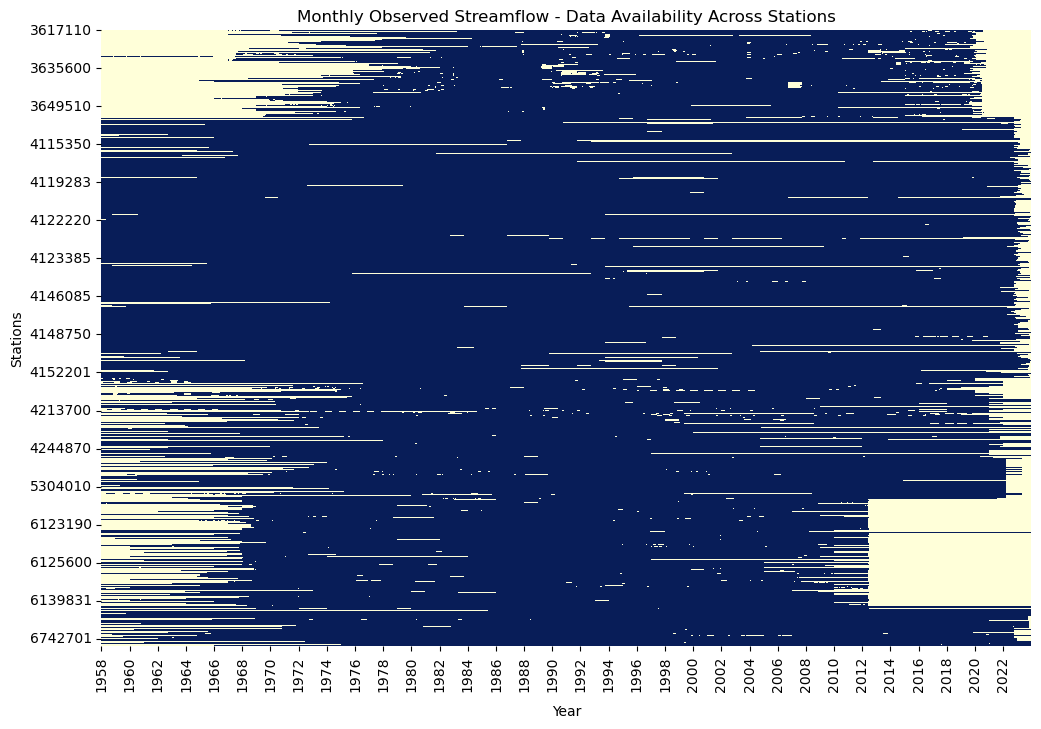

In [37]:
''' Missing Data Heatmap Visualization of the stations that resulted from the determination of the monthly recession constant (k) '''

df_processing = obs_df.copy()
print(f"Number of stations: {len(sim_sts)}")
df_processing[sim_sts] # Selecting only the stations that resulted from the previous analysis of recession constant (k) and are in the simulated data.
df_processing.index = pd.to_datetime(df_processing.index, format='%Y-%m')

# Convert to binary missing data (1 = data exists, 0 = missing)
missing_matrix = df_processing.notna().astype(int)
dates = df_processing.index

# Create a figure and axis explicitly
fig, ax = plt.subplots(figsize=(12, 8))

# Plot heatmap on the given axis
sns.heatmap(missing_matrix.T, cmap="YlGnBu", cbar=False, yticklabels=50) # Yellow & blue: cmap="YlGnBu" (lighter = missing, darker = available).

# Set x-ticks to show only the first day of every second year
year_starts = dates[dates.dayofyear == 1]  # Get only the first day of each year
year_starts = year_starts[year_starts.year % 2 == 0]  # Filter to include only even years
xtick_locs = [dates.get_loc(date) for date in year_starts]  # Convert to index positions
xtick_labels = [date.strftime('%Y') for date in year_starts]  # Extract only the year

ax.set_xticks(xtick_locs)
ax.set_xticklabels(xtick_labels, rotation=90)  # Rotate for better visibility

# Adjust space between x-tick labels and x-axis label
ax.set_xlabel("Year", labelpad=10)  # Increase labelpad to add more space

# Labels and title
ax.set_ylabel("Stations")
ax.set_title("Monthly Observed Streamflow - Data Availability Across Stations")

plt.show()

Number of stations: 590


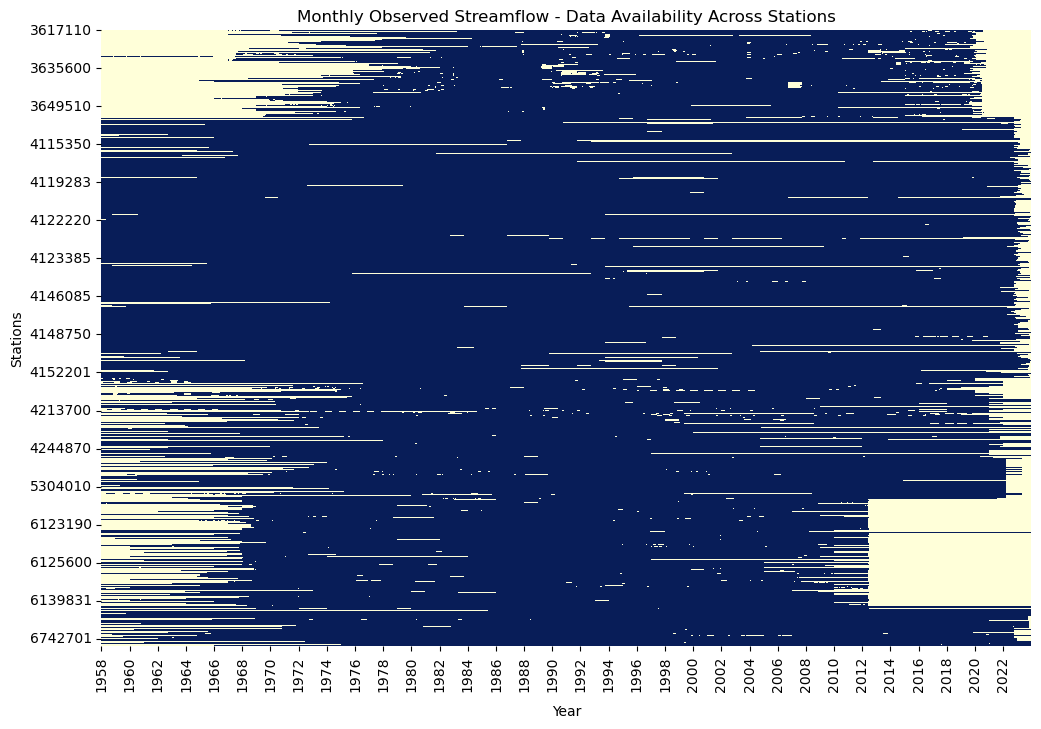

In [38]:
''' Missing Data Heatmap Visualization of the stations that passed the validation analysis based on monthly k recessions '''

df_processing = obs_df.copy()
print(f"Number of stations: {len(stats_all_years_no_low_r)}")
df_processing[stats_all_years_no_low_r.index] # Select only the stations that passed the validation analysis
df_processing.index = pd.to_datetime(df_processing.index, format='%Y-%m')

# Convert to binary missing data (1 = data exists, 0 = missing)
missing_matrix = df_processing.notna().astype(int)
dates = df_processing.index

# Create a figure and axis explicitly
fig, ax = plt.subplots(figsize=(12, 8))

# Plot heatmap on the given axis
sns.heatmap(missing_matrix.T, cmap="YlGnBu", cbar=False, yticklabels=50) # Yellow & blue: cmap="YlGnBu" (lighter = missing, darker = available).

# Set x-ticks to show only the first day of every second year
year_starts = dates[dates.dayofyear == 1]  # Get only the first day of each year
year_starts = year_starts[year_starts.year % 2 == 0]  # Filter to include only even years
xtick_locs = [dates.get_loc(date) for date in year_starts]  # Convert to index positions
xtick_labels = [date.strftime('%Y') for date in year_starts]  # Extract only the year

ax.set_xticks(xtick_locs)
ax.set_xticklabels(xtick_labels, rotation=90)  # Rotate for better visibility

# Adjust space between x-tick labels and x-axis label
ax.set_xlabel("Year", labelpad=10)  # Increase labelpad to add more space

# Labels and title
ax.set_ylabel("Stations")
ax.set_title("Monthly Observed Streamflow - Data Availability Across Stations")

plt.show()